# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
type(3.5)

float

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [47]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualization

Text(0.5, 1.0, 'Hours Studied vs Marks Scored')

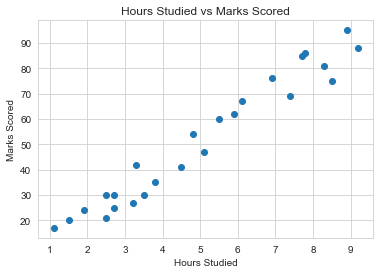

In [48]:
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Hours Studied vs Marks Scored')

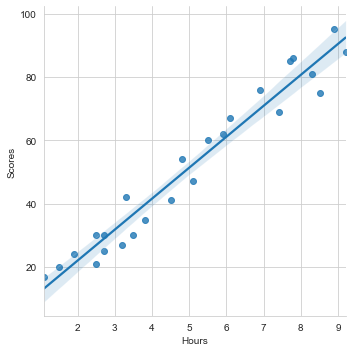

In [23]:
sns.set_style('whitegrid')
sns.lmplot('Hours','Scores',data)

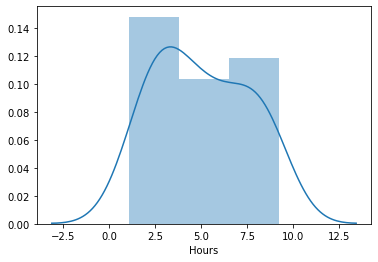

In [5]:
sns.distplot(data['Hours'])

In [30]:
X=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values.reshape(-1,1)

# Modeling

In [129]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=26)

In [125]:
from sklearn.metrics import mean_absolute_error

In [126]:
model=LinearRegression()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print(mean_absolute_error(y_test,y_preds))

4.167033588293979


# Prediction

In [127]:
output=model.predict([[9.25]])
output

array([[91.53356501]])

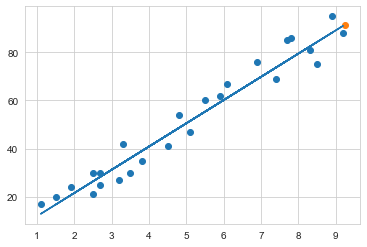

In [128]:
plt.plot(data['Hours'].values.reshape(-1,1),model.predict(data['Hours'].values.reshape(-1,1)))
plt.scatter(data['Hours'],data['Scores'])
plt.scatter(9.25,output)

In [141]:
np.concatenate([y_test,y_preds],axis=1)

array([[41.        , 45.68935151],
       [17.        , 12.87454606],
       [62.        , 59.20133023],
       [81.        , 82.36472231],
       [95.        , 88.15557034],
       [85.        , 76.57387429],
       [24.        , 20.59567675],
       [30.        , 28.31680745]])